In [1]:
!pip install stable-baselines[mpi]
!pip install stable_baselines3
!pip install tensorflow==1.15.0
!pip install gym

     |████████████████████████████████| 240 kB 7.9 MB/s 
     |████████████████████████████████| 2.4 MB 29.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.1-cp37-cp37m-linux_x86_64.whl size=2180653 sha256=dbff40b69ffc16cb0987728a46f9231f8fe844fd99a90bdc8a65a894ada8760e
  Stored in directory: /root/.cache/pip/wheels/91/be/c0/2b0347be1de5cd8ca9fe67da7ec8c3fe8930fcb6b0df6f2255
Successfully built mpi4py
     |████████████████████████████████| 172 kB 8.1 MB/s 
     |████████████████████████████████| 412.3 MB 24 kB/s 
     |████████████████████████████████| 503 kB 40.2 MB/s 
     |████████████████████████████████| 3.8 MB 39.6 MB/s 
     |████████████████████████████████| 50 kB 5.4 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=9efcd37ac1975e89506f79265a3c5bfb412e939d99fed4811660c30e0c1c7378
  Stored in directory: /root/.c

In [2]:
import tensorflow as tf
print(tf.__version__)

import numpy as np
np.random.seed(99)

import gym

import matplotlib.pyplot as plt
import matplotlib.cm as cm

1.15.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""
TEST CODE HERE
"""  



###

In [4]:
class BasicEnv(gym.Env):
    
    def __init__(self, numOfPistons, timeSteps):
      self.n_pistons = numOfPistons
      self.action_space = gym.spaces.MultiBinary(self.n_pistons)
      self.observation_space = gym.spaces.Discrete(self.n_pistons)
      self.ball_state = 0
      self.reward = 0
      self.t = timeSteps
      self.done = False

    def step(self, action):
    
      #all(v == 0 for v in action[self.ball_state+1:3]) 
      if action[self.ball_state] > action[self.ball_state + 1]: # ball going forwards
        self.ball_state += 1
        self.reward += 1
        self.t -= 1
        
      else: # ball not moving
        self.t -= 1 
        self.reward -= 1

      if self.ball_state + 1 == self.n_pistons or self.t == 0:
        self.done = True

      info = {}

      return self.ball_state, self.reward, self.done, info

    def reset(self):
      self.ball_state = 0

      return self.ball_state

    




In [5]:
from stable_baselines.common.env_checker import check_env
env = BasicEnv(20, 100) 
check_env(env)



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [ ]:
from stable_baselines import PPO2
steps = 100
t = 1000
episodes = 100
seed = 99
pistons_n = 20

env = BasicEnv(pistons_n, 500)

model = PPO2("MlpPolicy", env, verbose=1, n_steps=steps, seed=99,tensorboard_log="/content/drive/My Drive/FYP/Logs/")
model.learn(total_timesteps=t)


In [14]:
!tensorboard --logdir /content/drive/My_Drive/FYP/Logs/PPO_2/ --host localhost --port 6006

TensorBoard 1.15.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


In [6]:
model.save("/content/drive/My Drive/FYP/Policies/Piston_Ball_Binary_1.0")

In [8]:
model = PPO2.load("/content/drive/My Drive/FYP/Policies/Piston_Ball_Binary_1.0")

Loading a model without an environment, this model cannot be trained until it has a valid environment.


In [ ]:
n_steps = 500
num_of_episodes = 5
reward_lst = np.zeros( (num_of_episodes, n_steps) )
number_pistons = 20

for i in range(num_of_episodes):
  env = BasicEnv(number_pistons, 500)
  obs = env.reset()
  
  for step in range(n_steps):
      
      action, _ = model.predict(obs, deterministic = False)
      print(f"Step: {step + 1}\nAction: {action}")
      obs, reward, done, info = env.step(action)

      reward_lst[i, step] = reward
      print(f"Ball Location: {obs + 1}\nReward: {reward}\n\n")

      if done and obs + 1 == 10:
        print("Goal Achieved")
        break
        
      if done:
        print("Max Steps Reached")
        break

#print(f"Total: {sum(reward_lst)}")
#print(f"Avg: {sum(reward_lst) / len(reward_lst)}")
#reward_lst.clear()

In [10]:
print(f"Number of Pistons: {number_pistons}\n\n")
averages = np.zeros( (num_of_episodes, 3) )
for i in range(num_of_episodes):
  non_zero_array = np.trim_zeros(reward_lst[i,:])
  mean_of_array = np.mean(non_zero_array)
  sum_of_array = np.sum(non_zero_array)
  num_of_timesteps = len(non_zero_array)
  print(f"Episode {i + 1}:\nMean: {mean_of_array}\nSum: {sum_of_array}\nTimesteps: {num_of_timesteps}\n")
  averages[i, :] = mean_of_array, sum_of_array, num_of_timesteps
print(f"\nMean Timestep: {np.mean(averages,axis=0)}")

Number of Pistons: 20


Episode 1:
Mean: -18.555555555555557
Sum: -1336.0
Timesteps: 72

Episode 2:
Mean: -8.73076923076923
Sum: -454.0
Timesteps: 52

Episode 3:
Mean: -28.698924731182796
Sum: -2669.0
Timesteps: 93

Episode 4:
Mean: -14.136363636363637
Sum: -933.0
Timesteps: 66

Episode 5:
Mean: -34.88
Sum: -3488.0
Timesteps: 100


Mean Timestep: [  -21.00032263 -1776.            76.6       ]


Last Reward: -34.0 for Episode 1
Last Reward: -14.0 for Episode 2
Last Reward: -55.0 for Episode 3
Last Reward: -28.0 for Episode 4
Last Reward: -62.0 for Episode 5


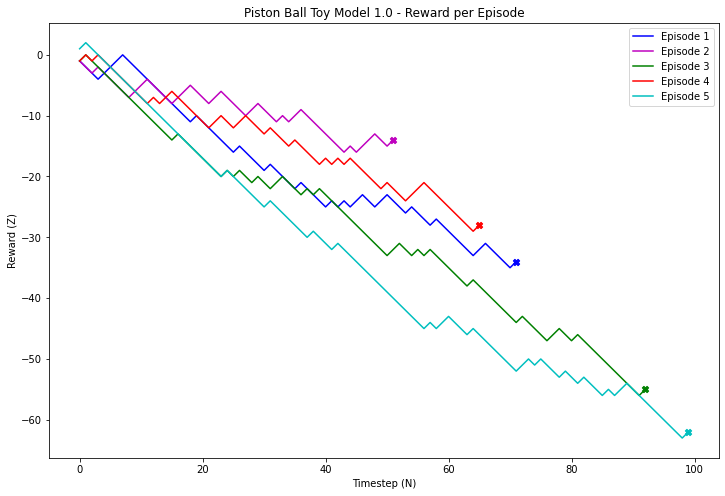

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(12, 8))
colors = ["b", "m", "g", "r", "c"]
for i in range(reward_lst.shape[0]):
  test = np.trim_zeros(reward_lst[i, :])
  ax.plot(test,color=colors[i])
  ax.scatter(len(test)-1, test[-1], marker='X',color=colors[i],s=40)
  ax.legend([f"Episode {i+1}" for i in range(reward_lst.shape[0])])
  plt.title("Piston Ball Toy Model 1.0 - Reward per Episode")
  print(f"Last Reward: {test[-1]} for Episode {i + 1}")
  ax.set_xlabel("Timestep (N)")
  ax.set_ylabel("Reward (Z)")
